In [2]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
ds = pd.read_csv('cars.csv')

In [4]:
car_type_counts = ds[['sports_car', 'suv', 'wagon', 'minivan', 'pickup', 'all_wheel', 'rear_wheel']].sum()

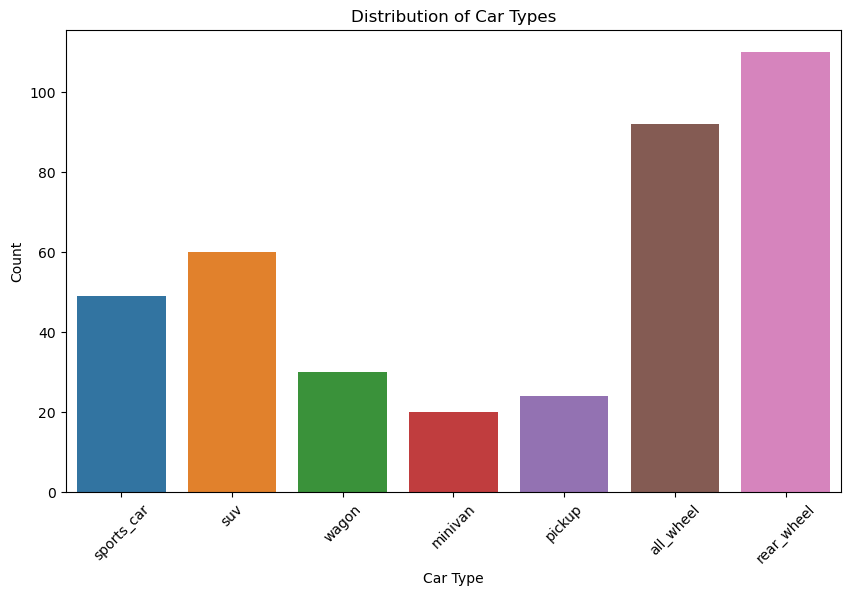

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.index, y=car_type_counts.values)
plt.title('Distribution of Car Types')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
num_cars = ds.shape[0]

print(f"The number of cars in the dataset is: {num_cars}")

The number of cars in the dataset is: 428


In [7]:
ds['brand'] = ds['name'].str.split().str[0]
brand_counts = ds['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']
toyota_count = brand_counts[brand_counts['brand'] == 'Toyota']['count'].values[0]
toyota_count

28

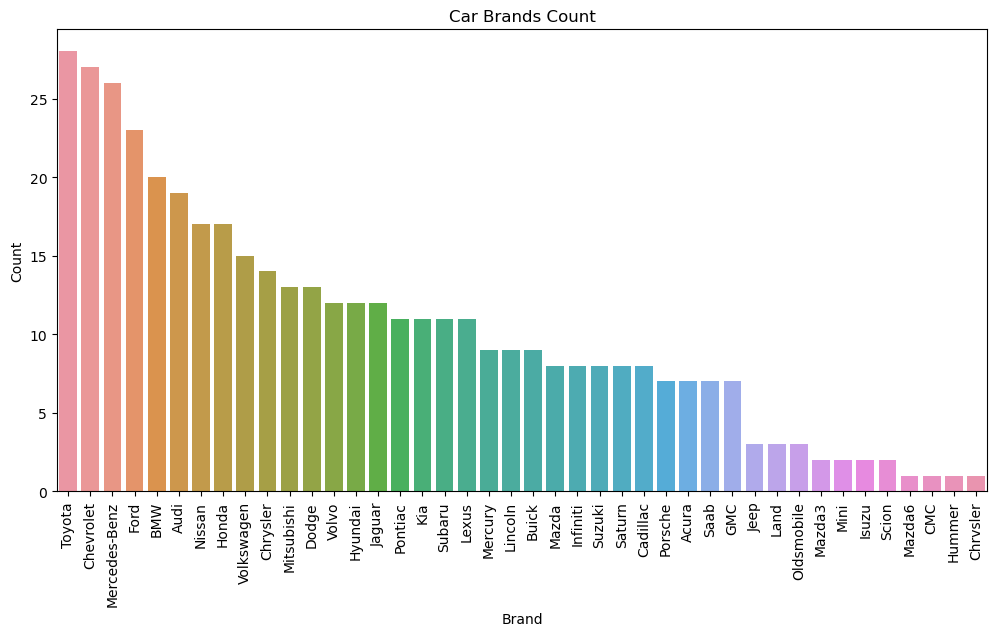

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='count', data=brand_counts)
plt.title('Car Brands Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [9]:
ds['power_to_weight_ratio'] = ds['horsepwr'] / ds['weight']

In [10]:
def calculate_performance(row):
    if row['sports_car']:
        return row['power_to_weight_ratio'] * row['eng_size'] * 2
    else:
        return row['power_to_weight_ratio'] * row['eng_size']

In [11]:
ds['performance_score'] = ds.apply(calculate_performance, axis=1)

In [12]:
ds['performance_rank'] = ds['performance_score'].rank(ascending=False)


In [13]:
top_10_powerful = ds.nlargest(10, 'performance_score')

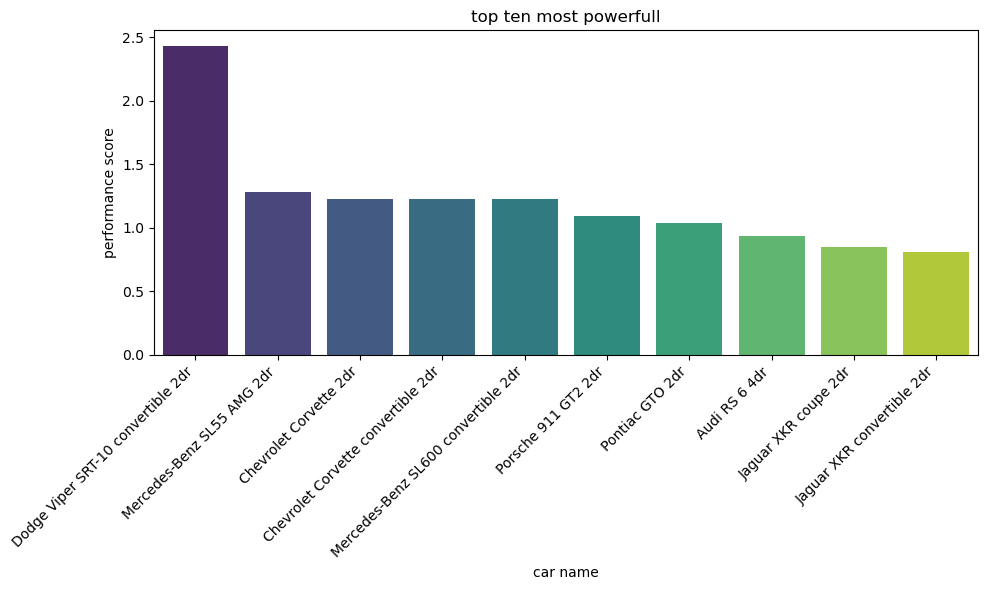

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'name', y='performance_score', data = top_10_powerful, palette= 'viridis')
plt.title('top ten most powerfull')
plt.xlabel('car name')
plt.ylabel('performance score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
def calculate_score(row):
    weight_price = 0.3
    weight_performance = 0.4
    weight_fuel_efficiency = 0.3
    normalized_price = 1 - (row['msrp'] / ds['msrp'].max())
    normalized_performance = row['performance_score'] / ds['performance_score'].max()
    normalized_fuel_efficiency = row['city_mpg'] / ds['city_mpg'].max()
    score = (weight_price * normalized_price) + (weight_performance * normalized_performance) + (weight_fuel_efficiency * normalized_fuel_efficiency)
    return score

In [16]:
ds['score'] = ds.apply(calculate_score, axis=1)
ds['score_rank'] = ds['score'].rank(ascending=False)
top_10_scores = ds.nlargest(10, 'score')

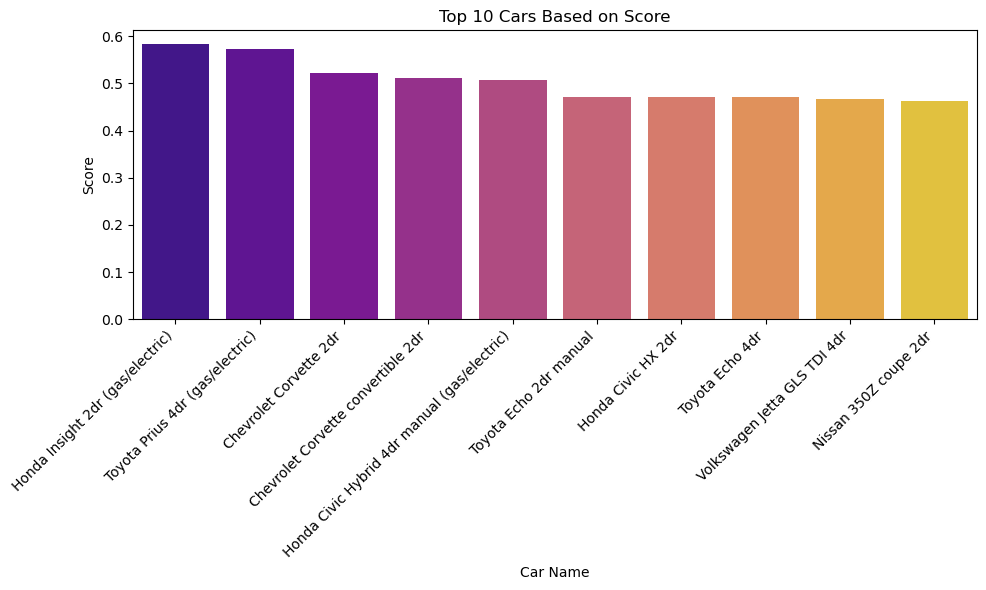

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='score', data=top_10_scores, palette='plasma')
plt.title('Top 10 Cars Based on Score')
plt.xlabel('Car Name')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
X = ds[['eng_size', 'horsepwr', 'city_mpg', 'hwy_mpg']]
y = ds['msrp']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [37]:
model = LinearRegression()

model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

In [38]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 9200.638339650488


In [39]:
residuals = y_test - y_pred

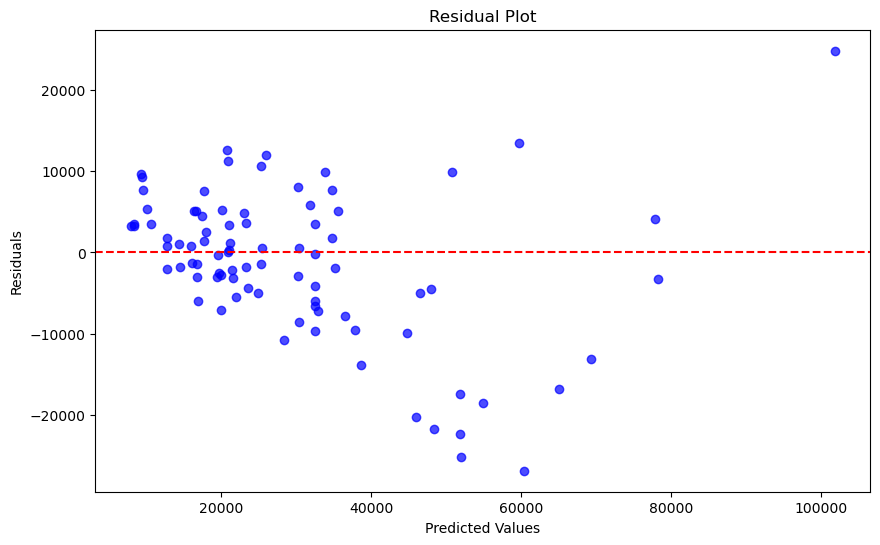

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()